In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

import utils

In [10]:
X_train, y_train, X_test, y_test = utils.load_mnist()

In [16]:
# Let's do the fft manually and see what we get
def manualfft(image):
    dctimage = np.zeros(image.shape)
    ksum = 0
    for k1 in range(image.shape[0]):
        for k2 in range(image.shape[1]):
            for n1 in range(image.shape[0]):
                for n2 in range(image.shape[1]):
                    ksum += image[n1, n2]*np.cos(np.pi/image.shape[0]*(n1+0.5)*k1)*np.cos(np.pi/image.shape[1]*(n2+0.5)*k2)
            dctimage[k1][k2] = ksum
            ksum = 0
            
    return dctimage

In [18]:
dctimage = manualfft(X_train[0].squeeze(0))
dctimage.shape

(28, 28)

In [19]:
print(dctimage.min())
print(dctimage.max())

-70.94374450657244
107.94117754790932


In [20]:
print(dctimage)

[[ 1.07941178e+02 -1.70056372e+00 -7.09437445e+01  3.93797513e+00
   1.55387426e+01 -3.84359554e+00  1.92452723e+00  1.07506967e+00
  -3.58865817e+00  4.15989822e+00  4.17938939e+00 -8.35265388e+00
   1.70202692e+00  7.35844291e+00 -2.44853049e+00 -2.92169789e+00
  -1.26431812e+00  3.11712853e-02 -4.13404412e-01  4.03682759e-01
   1.75015478e+00 -3.10243764e-01  1.20371856e-01 -7.61963537e-02
  -1.36585595e+00  1.12284982e+00  1.51469596e+00 -2.04245405e+00]
 [-4.42379713e+00 -9.28159324e+00  1.52392854e+00  7.36184754e+00
   3.00830534e+00  7.60260310e+00 -3.55950373e+00 -2.74222136e+00
   6.92575668e-01 -4.45042276e+00  1.64146181e+00 -1.80334075e+00
  -1.29439013e+00  5.09347407e+00 -2.83323572e-01 -2.60495056e+00
   5.63455433e-01  6.94803531e-01  7.77270910e-02  1.49509742e+00
   2.76179096e-02 -1.00858163e+00 -5.55148649e-01 -1.46552186e+00
   7.44508163e-01  1.14135603e+00 -5.72071453e-01  2.87671694e-01]
 [-1.88103016e+01  8.22228913e+00  2.09298273e+01 -1.44941541e+01
  -1.549

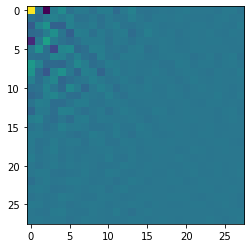

In [21]:
idx = 5000
plt.imshow(((dctimage - dctimage.min()) / (dctimage.max() - dctimage.min())).reshape((28,28))) # Matrix values scaled for visualization
plt.show()